In [1]:
from dataloader import CitationDataset
import pandas as pd
import numpy as np
import networkx as nx

## 1. load data

In [2]:
# load dataset
# setting subset=True only loads the smaller of the four files
dataset = CitationDataset()
df = dataset.load_dataframe()

loading dataframe from cache /Users/oas/Documents/02807_project/DATA/dblp-ref
loading /Users/oas/Documents/02807_project/DATA/dblp-ref/dblp-ref-3.json
loading /Users/oas/Documents/02807_project/DATA/dblp-ref/dblp-ref-2.json
loading /Users/oas/Documents/02807_project/DATA/dblp-ref/dblp-ref-1.json
loading /Users/oas/Documents/02807_project/DATA/dblp-ref/dblp-ref-0.json


In [3]:
# get memory usage
df.memory_usage(deep=True).sum() / 1000000, "MB"

(4645.287923, 'MB')

In [4]:
# nan values are filled already.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3079007 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   abstract    object
 1   authors     object
 2   n_citation  int64 
 3   references  object
 4   title       object
 5   venue       object
 6   year        int64 
 7   id          object
dtypes: int64(2), object(6)
memory usage: 211.4+ MB


In [5]:
df

,abstract,authors,n_citation,references,title,venue,year,id
0,AdaBoost algorithm based on Haar-like features...,"[Zheng Xu, Runbin Shi, Zhihao Sun, Yaqi Li, Yu...",0,"[0a11984c-ab6e-4b75-9291-e1b700c98d52, 1f4152a...",A Heterogeneous System for Real-Time Detection...,high performance computing and communications,2016,001eef4f-1d00-4ae6-8b4f-7e66344bbc6e
1,"In this paper, a kind of novel jigsaw EBG stru...","[Yufei Liang, Yan Zhang, Tao Dong, Shan-wei Lu]",0,[],A novel conformal jigsaw EBG structure design,international conference on conceptual structures,2016,002e0b7e-d62f-4140-b015-1fe29a9acbaa
2,This paper studies the problem of using an aut...,"[Xiaodong Ai, Keyou You, Shiji Song]",0,"[1862a08a-08c6-4ab1-a214-8932bbd0d2d9, 7bcea2f...",A source-seeking strategy for an autonomous un...,"international conference on control, automatio...",2016,00352759-f0a7-4678-82ae-fed68c700da6
3,,"[Francine Berman, Vinton G. Cerf]",0,[],Social and ethical behavior in the internet of...,Communications of The ACM,2017,00f77fa9-ae49-4935-9166-2f5f9cdb3d6b
4,,"[Leon A. Sakkal, Kyle Z. Rajkowski, Roger S. A...",50,"[4f4f200c-0764-4fef-9718-b8bccf303dba, aa699fb...",Prediction of consensus binding mode geometrie...,Journal of Computational Chemistry,2017,013ea675-bb58-42f8-a423-f5534546b2b1
...,...,...,...,...,...,...,...,...
999995,,"[Julien Stephan, Mathieu Brau, Yoann Corre, Yv...",4,"[13706ee7-da12-440d-8b13-ab6106e77887, 16a2526...",On the Effect of Realistic Traffic Demand Rise...,vehicular technology conference,2014,4aa66242-5efc-464f-8b80-463691a50e2e
999996,"In the last few years, workflow systems have b...",[Giacomo Piccinelli],10,"[02763555-4d84-49fa-b6aa-00171c832dc0, 4be4595...",Distributed workflow management: the TEAM model,cooperative information systems,1998,4aa672c2-c5e6-469d-b168-2056474cf47f
999997,There are many different designs for audio amp...,"[Stephen M. Cox, Bruce H. Candy]",19,[3059f971-f49e-4a49-a1e5-82ea4e8f6879],Class-D Audio Amplifiers with Negative Feedback,Siam Journal on Applied Mathematics,2005,4aa67ed9-6b28-4ed4-a180-13d3a0dc0a59
999998,This paper proposes a language acquisition fra...,"[Tao Gong, James W. Minett, William S-Y. Wang]",5,"[207c4e1c-52f4-4737-9cd9-1db86b33d580, 55c81e3...",A simulation study exploring the role of cultu...,Connection Science,2010,4aa692aa-2448-436c-a809-81b54e5f2f66


## 2. load graph

In [6]:
G = dataset.load_graph(df)

100%|██████████| 3079007/3079007 [08:34<00:00, 5983.12it/s] 


In [7]:
# should be like it says on the website: DBLP-Citation-network V10:  3,079,007 papers and 25,166,994 citation relationships (2017-10-27)
G.number_of_nodes(), G.number_of_edges()

(3079007, 25166994)

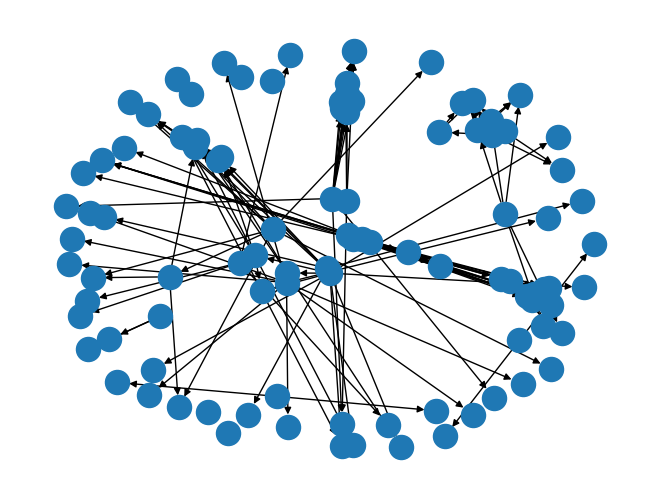

In [8]:
# plot first 100 nodes and edges
nx.draw(G.subgraph(list(G.nodes.keys())[:100]))

In [9]:
# print the very first node
_g = G.nodes.items().__iter__() # create generator
index, node = _g.__next__() # get first value
print("index:",index)
node
    

index: 001eef4f-1d00-4ae6-8b4f-7e66344bbc6e


{'abstract': 'AdaBoost algorithm based on Haar-like features can achieves high accuracy (above 95%) in object detection. Meanwhile massive computing power is needed to implement the cascaded classifiers involved in AdaBoost detection. To solve this problem, several dedicated hardware solutions have been proposed for real-time applications. In this work, a novel heterogeneous architecture of an AdaBoost detector is presented. This architecture achieves higher performance while consuming fewer hardware resources. By combining an integrated ARM Cortex-A9 processor with a dedicated accelerator, this architecture can be configured to realize various objects detection by simply loading different parameters. 2-D parallelism is involved in accelerator unit combination which brings more flexibility. This scheme is implemented on Xilinx ZC702 platform, the experiment result shows that 40 QVGA frames per second can be achieved for real-time face detection. The accelerator achieves more than 13 ti